In [171]:
# SGP30 sensor analysis and filter design
# Hans Verdolaga
# MSc Mechatronics 2023
# MC-F23 Thesis

In [172]:
# Import libraries
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
%matplotlib inline

# Get current working directory
import os
os.getcwd()

'd:\\D drive Documents\\Python 3\\SDU\\SDU - Thesis\\Implementation\\Analysis 05-04-23'

In [173]:
# Function to convert datetime column to seconds
def convertToSeconds(df):
# Parse timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')
    firstTimestamp = df['timestamp'][0]
    # Convert datetime to seconds
    df['timestamp'] = (df['timestamp'] - firstTimestamp)

    # Convert datetime to float
    df['timestamp'] = df['timestamp'].astype('timedelta64[ms]').astype(float)/1000
    return df

# Function to import data from CSV file and convert timestamp column to seconds
def importData(fileName):
    df = pd.read_csv(fileName, sep=',')
    df = convertToSeconds(df)
    return df

# Function to generate 30 second period square wave
def generateSquareWave(period, amplitude, offset, time):
    squareWave = []
    for i in time:
        if i % period < period/2:
            squareWave.append(0 + offset)
        else:
            squareWave.append(amplitude + offset)
    return squareWave

# Function to generate ethanol square wave to match experiment
def generateGasSquareWave(df):
    # Get index of timestamp at 30 seconds (Releasing ethanol plume)
    index30 = df[df['timestamp'] >= 30].index[0]

    gasTurnOn = generateSquareWave(60, 1, 0, df['timestamp'])
    
    # Shift gasTurnOn by index30
    temp = np.zeros(index30)
    gasTurnOn = np.array(gasTurnOn[index30:])

    return np.insert(gasTurnOn, 0, temp)

In [174]:
parentFolder = 'Readings 14-04-23/'

# Comparative graph of left and right sensors to introduce topic
compareFile = '2023-04-14_noBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
dfCompareLeftNoBL = importData(parentFolder + 'leftSensor_' + compareFile + '.csv')
dfCompareRightNoBL = importData(parentFolder + 'rightSensor_' + compareFile + '.csv')
compareFile = '2023-04-14_withBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
dfCompareLeftWithBL = importData(parentFolder + 'leftSensor_' + compareFile + '.csv')
dfCompareRightWithBL = importData(parentFolder + 'rightSensor_' + compareFile + '.csv')

Text(0, 0.5, 'Gas on')

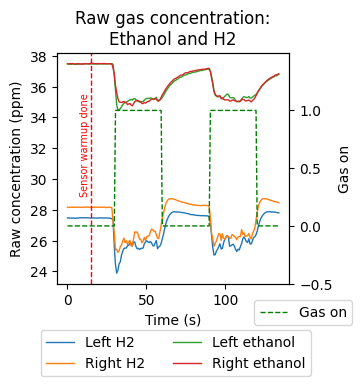

In [175]:
# Plot of raw signals: Ethanol and H2
plt.figure(figsize=(3,3))
plt.title('Raw gas concentration:\nEthanol and H2')

# Ethanol and H2 readings have been scaled by 512, 
# must be divided to get the real value

plt.plot(dfCompareLeftNoBL['timestamp'], dfCompareLeftNoBL['H2']/512, label='Left H2', linewidth=1)
plt.plot(dfCompareRightNoBL['timestamp'], dfCompareRightNoBL['H2']/512, label='Right H2', linewidth=1)
plt.plot(dfCompareLeftNoBL['timestamp'], dfCompareLeftNoBL['ethanol']/512, label='Left ethanol', linewidth=1)
plt.plot(dfCompareRightNoBL['timestamp'], dfCompareRightNoBL['ethanol']/512, label='Right ethanol', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Raw concentration (ppm)')
plt.xlabel('Time (s)')

# Draw vertical line
plt.axvline(x=15, color='r', linestyle='--', linewidth=1)
plt.text(8, 29, 'Sensor warmup done', color='r',rotation=90, fontsize=7)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfCompareRightNoBL['timestamp'], generateGasSquareWave(dfCompareRightNoBL), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.125))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

Text(0, 0.5, 'Gas on')

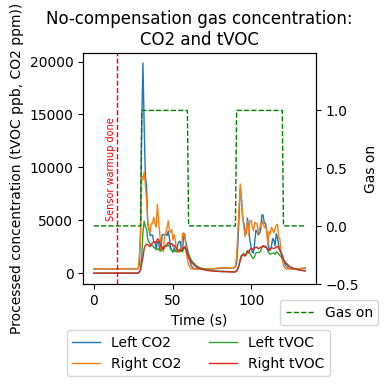

In [176]:
# Plot of processed signals: tVOC and CO2 with internal baseline
plt.figure(figsize=(3,3))
plt.title('No-compensation gas concentration:\nCO2 and tVOC')
plt.plot(dfCompareLeftNoBL['timestamp'], dfCompareLeftNoBL['CO2'], label='Left CO2', linewidth=1)
plt.plot(dfCompareRightNoBL['timestamp'], dfCompareRightNoBL['CO2'], label='Right CO2', linewidth=1)
plt.plot(dfCompareLeftNoBL['timestamp'], dfCompareLeftNoBL['tVOC'], label='Left tVOC', linewidth=1)
plt.plot(dfCompareRightNoBL['timestamp'], dfCompareRightNoBL['tVOC'], label='Right tVOC', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Processed concentration (tVOC ppb, CO2 ppm))')
plt.xlabel('Time (s)')

# Draw vertical line
plt.axvline(x=15, color='r', linestyle='--', linewidth=1)
plt.text(8, 5200, 'Sensor warmup done', color='r',rotation=90, fontsize=7)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfCompareLeftNoBL['timestamp'], generateGasSquareWave(dfCompareLeftNoBL), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.125))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

Text(0, 0.5, 'Gas on')

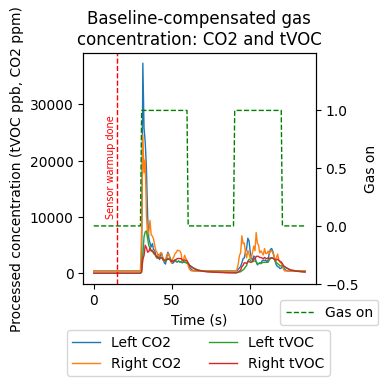

In [177]:
# Plot of processed signals: tVOC and CO2 with user set baseline
plt.figure(figsize=(3,3))
plt.title('Baseline-compensated gas\nconcentration: CO2 and tVOC')
plt.plot(dfCompareLeftWithBL['timestamp'], dfCompareLeftWithBL['CO2'], label='Left CO2', linewidth=1)
plt.plot(dfCompareRightWithBL['timestamp'], dfCompareRightWithBL['CO2'], label='Right CO2', linewidth=1)
plt.plot(dfCompareLeftWithBL['timestamp'], dfCompareLeftWithBL['tVOC'], label='Left tVOC', linewidth=1)
plt.plot(dfCompareRightWithBL['timestamp'], dfCompareRightWithBL['tVOC'], label='Right tVOC', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Processed concentration (tVOC ppb, CO2 ppm)')
plt.xlabel('Time (s)')

# Draw vertical line
plt.axvline(x=15, color='r', linestyle='--', linewidth=1)
plt.text(8, 10000, 'Sensor warmup done', color='r',rotation=90, fontsize=7)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfCompareLeftWithBL['timestamp'], generateGasSquareWave(dfCompareLeftWithBL), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.125))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [178]:
# Maximum frequency - Load all TVOC files
tvocOff25Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_off_0deg_25cm_cold'
tvocOff25 = importData(parentFolder + tvocOff25Name + '.csv')
tvocLow25Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_25cm_cold'
tvocLow25 = importData(parentFolder + tvocLow25Name + '.csv')
tvocMed25Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_med_0deg_25cm_cold'
tvocMed25 = importData(parentFolder + tvocMed25Name + '.csv')
tvocHigh25Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_high_0deg_25cm_cold'
tvocHigh25 = importData(parentFolder + tvocHigh25Name + '.csv')
tvocLow50Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
tvocLow50 = importData(parentFolder + tvocLow50Name + '.csv')
tvocMed50Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_med_0deg_50cm_cold'
tvocMed50 = importData(parentFolder + tvocMed50Name + '.csv')
tvocHigh50Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_high_0deg_50cm_cold'
tvocHigh50 = importData(parentFolder + tvocHigh50Name + '.csv')
tvocLow75Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_75cm_cold'
tvocLow75 = importData(parentFolder + tvocLow75Name + '.csv')
tvocMed75Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_med_0deg_75cm_cold'
tvocMed75 = importData(parentFolder + tvocMed75Name + '.csv')
tvocHigh75Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_high_0deg_75cm_cold'
tvocHigh75 = importData(parentFolder + tvocHigh75Name + '.csv')
tvocLow100Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_100cm_cold'
tvocLow100 = importData(parentFolder + tvocLow100Name + '.csv')
tvocMed100Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_med_0deg_100cm_cold'
tvocMed100 = importData(parentFolder + tvocMed100Name + '.csv')
tvocHigh100Name = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_high_0deg_100cm_cold'
tvocHigh100 = importData(parentFolder + tvocHigh100Name + '.csv')


In [179]:
# Maximum frequency - Load all ethanol files
ethanolOff25Name = '2023-04-14_ethanol_exitenter_A_30sec_front_off_0deg_25cm_cold'
ethanolOff25 = importData(parentFolder + ethanolOff25Name + '.csv')
ethanolLow25Name = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_25cm_cold'
ethanolLow25 = importData(parentFolder + ethanolLow25Name + '.csv')
ethanolMed25Name = '2023-04-14_ethanol_exitenter_A_30sec_front_med_0deg_25cm_cold'
ethanolMed25 = importData(parentFolder + ethanolMed25Name + '.csv')
ethanolHigh25Name = '2023-04-14_ethanol_exitenter_A_30sec_front_high_0deg_25cm_cold'
ethanolHigh25 = importData(parentFolder + ethanolHigh25Name + '.csv')
ethanolLow50Name = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_50cm_cold'
ethanolLow50 = importData(parentFolder + ethanolLow50Name + '.csv')
ethanolMed50Name = '2023-04-14_ethanol_exitenter_A_30sec_front_med_0deg_50cm_cold'
ethanolMed50 = importData(parentFolder + ethanolMed50Name + '.csv')
ethanolHigh50Name = '2023-04-14_ethanol_exitenter_A_30sec_front_high_0deg_50cm_cold'
ethanolHigh50 = importData(parentFolder + ethanolHigh50Name + '.csv')
ethanolLow75Name = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_75cm_cold'
ethanolLow75 = importData(parentFolder + ethanolLow75Name + '.csv')
ethanolMed75Name = '2023-04-14_ethanol_exitenter_A_30sec_front_med_0deg_75cm_cold'
ethanolMed75 = importData(parentFolder + ethanolMed75Name + '.csv')
ethanolHigh75Name = '2023-04-14_ethanol_exitenter_A_30sec_front_high_0deg_75cm_cold'
ethanolHigh75 = importData(parentFolder + ethanolHigh75Name + '.csv')
ethanolLow100Name = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_100cm_cold'
ethanolLow100 = importData(parentFolder + ethanolLow100Name + '.csv')
ethanolMed100Name = '2023-04-14_ethanol_exitenter_A_30sec_front_med_0deg_100cm_cold'
ethanolMed100 = importData(parentFolder + ethanolMed100Name + '.csv')
ethanolHigh100Name = '2023-04-14_ethanol_exitenter_A_30sec_front_high_0deg_100cm_cold'
ethanolHigh100 = importData(parentFolder + ethanolHigh100Name + '.csv')


In [180]:
# Calculate average TVOC sampling frequency via mapping
tvocAverageSamplingFrequency = np.mean(list(map(lambda x: 1/np.mean(np.diff(x['timestamp'])), [tvocOff25, tvocLow25, tvocMed25, tvocHigh25, tvocLow50, tvocMed50, tvocHigh50, tvocLow75, tvocMed75, tvocHigh75, tvocLow100, tvocMed100, tvocHigh100])))
# tvocAverageSamplingFrequenncy # Sampling frequency for sampling  both sensors
tvocPerSensorFrequency = tvocAverageSamplingFrequency*2 # Sampling frequency for each sensor
tvocNyquistFrequency = tvocAverageSamplingFrequency/2 # Nyquist frequency for sampling both sensors

In [181]:
tvocAverageSamplingFrequency

9.3936335296193

In [182]:
# Calculate average ethanol sampling frequency via mapping
ethanolAverageSamplingFrequency = np.mean(list(map(lambda x: 1/np.mean(np.diff(x['timestamp'])), [ethanolOff25, ethanolLow25, ethanolMed25, ethanolHigh25, ethanolLow50, ethanolMed50, ethanolHigh50, ethanolLow75, ethanolMed75, ethanolHigh75, ethanolLow100, ethanolMed100, ethanolHigh100])))
ethanolAverageSamplingFrequency # Sampling frequency for sampling  both sensors
ethanolPerSensorFrequency = ethanolAverageSamplingFrequency*2 # Sampling frequency for each sensor
ethanolNyquistFrequency = ethanolAverageSamplingFrequency/2 # Nyquist frequency for sampling both sensors

Text(0, 0.5, 'Gas on')

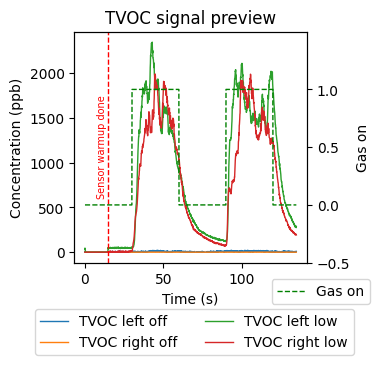

In [183]:
# Plot of TVOC signals
plt.figure(figsize=(3,3))
plt.title('TVOC signal preview')

plt.plot(tvocOff25['timestamp'], tvocOff25['tVOCLeft'], label='TVOC left off', linewidth=1)
plt.plot(tvocOff25['timestamp'], tvocOff25['tVOCRight'], label='TVOC right off', linewidth=1)
plt.plot(tvocLow50['timestamp'], tvocLow50['tVOCLeft'], label='TVOC left low', linewidth=1)
plt.plot(tvocLow50['timestamp'], tvocLow50['tVOCRight'], label='TVOC right low', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.2, -0.3), ncol=2)
plt.ylabel('Concentration (ppb)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=1)
plt.text(8, 620, 'Sensor warmup done', color='r',rotation=90, fontsize=7)

# Plot gas on in second axis
plt.twinx()
plt.plot(tvocLow50['timestamp'], generateGasSquareWave(tvocLow50), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.125))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

Text(0, 0.5, 'Gas on')

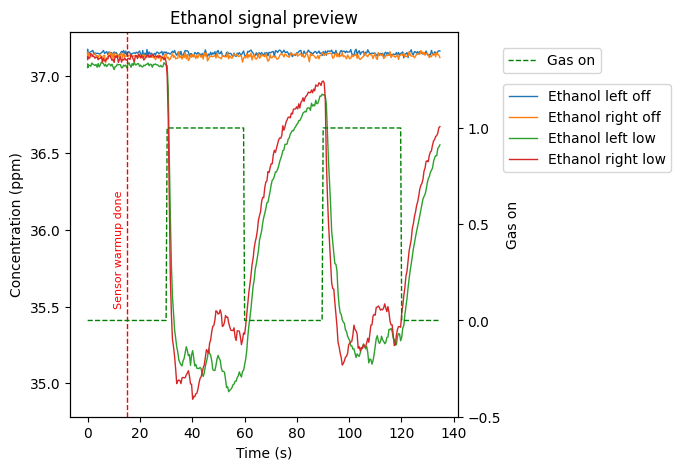

In [184]:
# Plot of ethanol signals
plt.figure(figsize=(5,5))
plt.title('Ethanol signal preview')

plt.plot(ethanolOff25['timestamp'], ethanolOff25['ethanolLeft']/512, label='Ethanol left off', linewidth=1)
plt.plot(ethanolOff25['timestamp'], ethanolOff25['ethanolRight']/512, label='Ethanol right off', linewidth=1)
plt.plot(ethanolLow50['timestamp'], ethanolLow50['ethanolLeft']/512, label='Ethanol left low', linewidth=1)
plt.plot(ethanolLow50['timestamp'], ethanolLow50['ethanolRight']/512, label='Ethanol right low', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.75))
plt.ylabel('Concentration (ppm)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=1)
plt.text(10, 35.5, 'Sensor warmup done', color='r',rotation=90, fontsize=8)

# Plot gas on in second axis
plt.twinx()
plt.plot(ethanolLow50['timestamp'], generateGasSquareWave(ethanolLow50), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3875, 0.925))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [185]:
# Comparative graph to show effect of distance to source
file25cm = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_25cm_cold'
file50cm = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_50cm_cold'
file75cm = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_75cm_cold'
file100cm = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_100cm_cold'
df25Left = importData(parentFolder + file25cm + '.csv')
df50Left = importData(parentFolder + file50cm + '.csv')
df75Left = importData(parentFolder + file75cm + '.csv')
df100Left = importData(parentFolder + file100cm + '.csv')

Text(0, 0.5, 'Gas on')

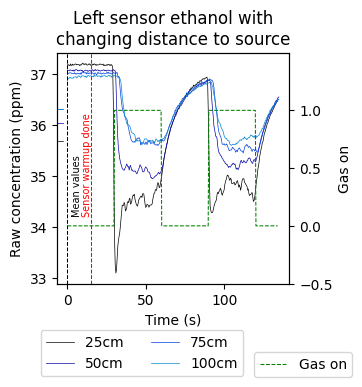

In [186]:
# Plot of raw ethanol
plt.figure(figsize=(3,3))
plt.title('Left sensor ethanol with\nchanging distance to source')

plt.plot(df25Left['timestamp'], df25Left['ethanolLeft']/512, label='25cm', color='xkcd:black', linewidth=0.5)
plt.plot(df50Left['timestamp'], df50Left['ethanolLeft']/512, label='50cm', color='xkcd:royal blue', linewidth=0.5)
plt.plot(df75Left['timestamp'], df75Left['ethanolLeft']/512, label='75cm', color='xkcd:blue', linewidth=0.5)
plt.plot(df100Left['timestamp'], df100Left['ethanolLeft']/512, label='100cm', color='xkcd:cerulean', linewidth=0.5)
# plt.plot(ethanolMed25['timestamp'], ethanolMed25['ethanolRight']/512, label='25cm', color='xkcd:black')
# plt.plot(ethanolMed50['timestamp'], ethanolMed50['ethanolRight']/512, label='50cm', color='xkcd:royal blue')
# plt.plot(ethanolMed75['timestamp'], ethanolMed75['ethanolRight']/512, label='75cm', color='xkcd:blue')
# plt.plot(ethanolMed100['timestamp'], ethanolMed100['ethanolRight']/512, label='100cm', color='xkcd:cerulean')

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Raw concentration (ppm)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=0.75)
plt.text(9, 34.25, 'Sensor warmup done', color='r',rotation=90, fontsize=7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.75)
plt.text(3, 34.25, 'Mean values', color='black',rotation=90, fontsize=7)

# Draw lines of ethanol means
plt.axhline(y=np.mean(df25Left['ethanolLeft']/512), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df50Left['ethanolLeft']/512), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df75Left['ethanolLeft']/512), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df100Left['ethanolLeft']/512), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)

# Plot gas on in second axis
plt.twinx()
plt.plot(df25Left['timestamp'], generateGasSquareWave(df25Left), 
         label='Gas on', color='g', linewidth=0.75, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.35))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [187]:
# Comparative graph to show effect of distance to source
file25cm = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_25cm_cold'
file50cm = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
file75cm = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_75cm_cold'
file100cm = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_100cm_cold'
df25Left = importData(parentFolder + file25cm + '.csv')
df50Left = importData(parentFolder + file50cm + '.csv')
df75Left = importData(parentFolder + file75cm + '.csv')
df100Left = importData(parentFolder + file100cm + '.csv')

Text(0, 0.5, 'Gas on')

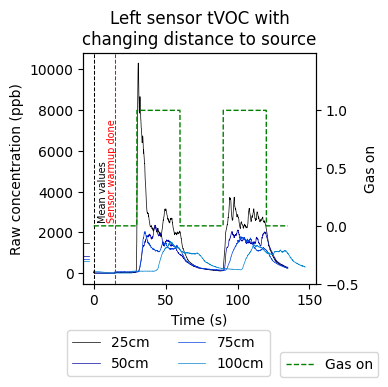

In [188]:
# Plot of processed tVOC
plt.figure(figsize=(3,3))
plt.title('Left sensor tVOC with\nchanging distance to source')

plt.plot(df25Left['timestamp'], df25Left['tVOCLeft'], label='25cm', color='xkcd:black', linewidth=0.5)
plt.plot(df50Left['timestamp'], df50Left['tVOCLeft'], label='50cm', color='xkcd:royal blue', linewidth=0.5)
plt.plot(df75Left['timestamp'], df75Left['tVOCLeft'], label='75cm', color='xkcd:blue', linewidth=0.5)
plt.plot(df100Left['timestamp'], df100Left['tVOCLeft'], label='100cm', color='xkcd:cerulean', linewidth=0.5)
# plt.plot(tvocMed25['timestamp'], tvocMed25['tvocRight']/512, label='25cm', color='xkcd:black')
# plt.plot(tvocMed50['timestamp'], tvocMed50['tvocRight']/512, label='50cm', color='xkcd:royal blue')
# plt.plot(tvocMed75['timestamp'], tvocMed75['tvocRight']/512, label='75cm', color='xkcd:blue')
# plt.plot(tvocMed100['timestamp'], tvocMed100['tvocRight']/512, label='100cm', color='xkcd:cerulean')

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Raw concentration (ppb)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=0.75)
plt.text(9, 2600, 'Sensor warmup done', color='r',rotation=90, fontsize=7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.75)
plt.text(3, 2600, 'Mean values', color='black',rotation=90, fontsize=7)

# Draw lines of tvoc means
plt.axhline(y=np.mean(df25Left['tVOCLeft']), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df50Left['tVOCLeft']), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df75Left['tVOCLeft']), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(df100Left['tVOCLeft']), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)

# Plot gas on in second axis
plt.twinx()
plt.plot(df25Left['timestamp'], generateGasSquareWave(df25Left), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.35))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [189]:
# Comparative graph to show effect of fan speed
fileOff = '2023-04-14_ethanol_exitenter_A_30sec_front_off_0deg_25cm_cold'
fileLow = '2023-04-14_ethanol_exitenter_A_30sec_front_low_0deg_50cm_cold'
fileMed = '2023-04-14_ethanol_exitenter_A_30sec_front_med_0deg_50cm_cold'
fileHigh = '2023-04-14_ethanol_exitenter_A_30sec_front_high_0deg_50cm_cold'
dfOffLeft = importData(parentFolder + fileOff + '.csv')
dfLowLeft = importData(parentFolder + fileLow + '.csv')
dfMedLeft = importData(parentFolder + fileMed + '.csv')
dfHighLeft = importData(parentFolder + fileHigh + '.csv')

Text(0, 0.5, 'Gas on')

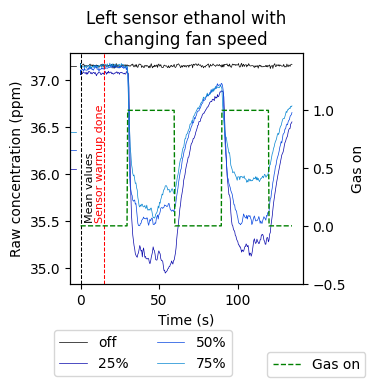

In [190]:
# Plot of raw ethanol
plt.figure(figsize=(3,3))
plt.title('Left sensor ethanol with\nchanging fan speed')

plt.plot(dfOffLeft['timestamp'], dfOffLeft['ethanolLeft']/512, label='off', color='xkcd:black', linewidth=0.5)
plt.plot(dfLowLeft['timestamp'], dfLowLeft['ethanolLeft']/512, label='25%', color='xkcd:royal blue', linewidth=0.5)
plt.plot(dfMedLeft['timestamp'], dfMedLeft['ethanolLeft']/512, label='50%', color='xkcd:blue', linewidth=0.5)
plt.plot(dfHighLeft['timestamp'], dfHighLeft['ethanolLeft']/512, label='75%', color='xkcd:cerulean', linewidth=0.5)
# plt.plot(ethanolMed25['timestamp'], ethanolMed25['ethanolRight']/512, label='25cm', color='xkcd:black')
# plt.plot(ethanolMed50['timestamp'], ethanolMed50['ethanolRight']/512, label='50cm', color='xkcd:royal blue')
# plt.plot(ethanolMed75['timestamp'], ethanolMed75['ethanolRight']/512, label='75cm', color='xkcd:blue')
# plt.plot(ethanolMed100['timestamp'], ethanolMed100['ethanolRight']/512, label='100cm', color='xkcd:cerulean')

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Raw concentration (ppm)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=0.75)
plt.text(9, 35.5, 'Sensor warmup done', color='r',rotation=90, fontsize=8)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.75)
plt.text(3, 35.5, 'Mean values', color='black',rotation=90, fontsize=8)

# Draw lines of ethanol means
plt.axhline(y=np.mean(dfOffLeft['ethanolLeft']/512), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfLowLeft['ethanolLeft']/512), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfMedLeft['ethanolLeft']/512), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfHighLeft['ethanolLeft']/512), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfOffLeft['timestamp'], generateGasSquareWave(dfOffLeft), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.35))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [191]:
# Comparative graph to show effect of fan speed
fileOff = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_off_0deg_25cm_cold'
fileLow = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
fileMed = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_med_0deg_50cm_cold'
fileHigh = '2023-04-14_tvoc_withBL_exitenter_A_30sec_front_high_0deg_50cm_cold'
dfOffLeft = importData(parentFolder + fileOff + '.csv')
dfLowLeft = importData(parentFolder + fileLow + '.csv')
dfMedLeft = importData(parentFolder + fileMed + '.csv')
dfHighLeft = importData(parentFolder + fileHigh + '.csv')

Text(0, 0.5, 'Gas on')

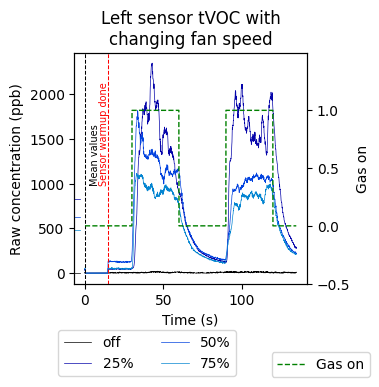

In [192]:
# Plot of processed tVOC
plt.figure(figsize=(3,3))
plt.title('Left sensor tVOC with\nchanging fan speed')

plt.plot(dfOffLeft['timestamp'], dfOffLeft['tVOCLeft'], label='off',color='xkcd:black', linewidth=0.5)
plt.plot(dfLowLeft['timestamp'], dfLowLeft['tVOCLeft'], label='25%',color='xkcd:royal blue', linewidth=0.5)
plt.plot(dfMedLeft['timestamp'], dfMedLeft['tVOCLeft'], label='50%',color='xkcd:blue', linewidth=0.5)
plt.plot(dfHighLeft['timestamp'], dfHighLeft['tVOCLeft'], label='75%', color='xkcd:cerulean', linewidth=0.5)
# plt.plot(tvocMed25['timestamp'], tvocMed25['tvocRight']/512, label='25cm', color='xkcd:black')
# plt.plot(tvocMed50['timestamp'], tvocMed50['tvocRight']/512, label='50cm', color='xkcd:royal blue')
# plt.plot(tvocMed75['timestamp'], tvocMed75['tvocRight']/512, label='75cm', color='xkcd:blue')
# plt.plot(tvocMed100['timestamp'], tvocMed100['tvocRight']/512, label='100cm', color='xkcd:cerulean')

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Raw concentration (ppb)')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--', linewidth=0.75)
plt.text(9, 1000, 'Sensor warmup done', color='r',rotation=90, fontsize=7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.75)
plt.text(3, 1000, 'Mean values', color='black',rotation=90, fontsize=7)

# Draw lines of tvoc means
plt.axhline(y=np.mean(dfOffLeft['tVOCLeft']), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfLowLeft['tVOCLeft']), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfMedLeft['tVOCLeft']), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)
plt.axhline(y=np.mean(dfHighLeft['tVOCLeft']), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025, linewidth=0.5)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfOffLeft['timestamp'], generateGasSquareWave(dfOffLeft), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.35))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [193]:
from scipy.signal import butter,filtfilt
# Filter requirements.
T = max(tvocMed25['timestamp']) - min(tvocMed25['timestamp'])        # Sample Period
tvocAverageSamplingFrequency = 9.6153846154       # sample rate, Hz
cutoff = 0.1      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
tvocNyquistFrequency = 0.5*tvocAverageSamplingFrequency   # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * tvocAverageSamplingFrequency) # total number of samples
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / tvocNyquistFrequency
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [194]:
# Apply filter
df25LeftFiltered = butter_lowpass_filter(df25Left['tVOCLeft'], cutoff, tvocAverageSamplingFrequency, order)

Text(0, 0.5, 'Gas on')

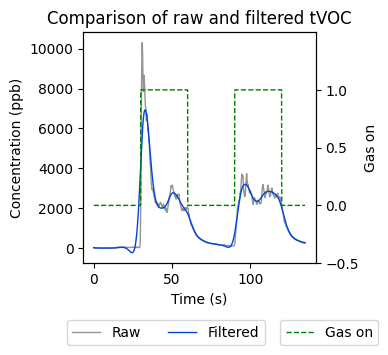

In [200]:
# Compare filtered and raw data
plt.figure(figsize=(3,3))
plt.title('Comparison of raw and filtered tVOC')

plt.plot(df25Left['timestamp'], df25Left['tVOCLeft'], label='Raw', color='xkcd:gray', linewidth=1)
plt.plot(df25Left['timestamp'], df25LeftFiltered, label='Filtered', color='xkcd:blue', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
plt.ylabel('Concentration (ppb)')
plt.xlabel('Time (s)')

# Plot gas on in second axis
plt.twinx()
plt.plot(tvocLow50['timestamp'], generateGasSquareWave(tvocLow50), 
         label='Gas on', color='g', linewidth=1, linestyle='--')
plt.legend(loc='center right', bbox_to_anchor=(1.3, -0.3))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [201]:
# Functions for extracting instantaneous, increment and decrement signals
### Return last instantaneous sample set of serial window
def getInstantWindow(data, idx, range = 5):
    if idx < range:
        return np.mean(data[0:idx])
    else:
        return np.mean(data[idx-range:idx])
    
### Return increment and decrements of sample set
def getDynamics(data, idx, range = 50):
    # Select data for dynamics calculation
    if idx < range:
        return 0, 0
    else:
        original = np.copy(data)[idx-range:idx]

        # Copy and shift data array backwards by one step
        shifted = np.copy(original)
        shifted = np.delete(shifted, shifted.size-1)
        shifted = np.insert(shifted, 0, shifted[0])

        # Calculate the difference between the two arrays
        diff = np.subtract(original, shifted)
        incArr = np.greater(diff, 0) # Get increments
        decArr = np.less(diff, 0) # Get decrements

        # Calculate and return normalized increments and decrements
        return np.sum(incArr)/len(incArr), np.sum(decArr)/len(decArr)

In [202]:
# Loop and calculate instantaneous, increment and decrement signals
df25Instant = []
df25Inc = []
df25Dec = []
for i in range(0, len(df25Left['tVOCLeft'])):
    # Calculate instantaneous signal
    df25Instant.append(getInstantWindow(df25LeftFiltered, i, 5))
    
    # Calculate increment and decrement signals
    tempInc, tempDec = getDynamics(df25LeftFiltered, i, 50)
    df25Inc.append(tempInc)
    df25Dec.append(tempDec)

d:\D drive Documents\Python 3\Environments\ENV-I-THESIS\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\D drive Documents\Python 3\Environments\ENV-I-THESIS\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'Time (s)')

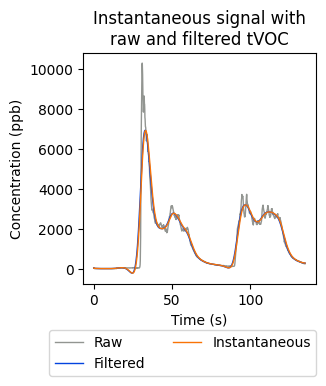

In [211]:
# Compare instantaneous with filtered and raw data
plt.figure(figsize=(3,3))
plt.title('Instantaneous signal with\nraw and filtered tVOC')

plt.plot(df25Left['timestamp'], df25Left['tVOCLeft'], label='Raw', color='xkcd:gray', linewidth=1)
plt.plot(df25Left['timestamp'], df25LeftFiltered, label='Filtered', color='xkcd:blue', linewidth=1)
plt.plot(df25Left['timestamp'], df25Instant, label='Instantaneous', color='xkcd:orange', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.175, -0.3), ncol=2)
plt.ylabel('Concentration (ppb)')
plt.xlabel('Time (s)')

# Plot gas on in second axis
# plt.twinx()
# plt.plot(tvocLow50['timestamp'], generateGasSquareWave(tvocLow50), 
#          label='Gas on', color='g', linewidth=1, linestyle='--')
# plt.legend(loc='center right', bbox_to_anchor=(1.3875, 0.925))
# plt.ylim(-0.5, 1.5)
# plt.yticks(np.arange(-0.5, 1.5, 0.5))
# plt.ylabel('Gas on')

Text(0, 0.5, '% distribution in \nlast 50 samples')

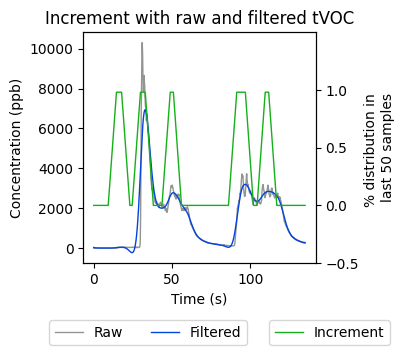

In [215]:
# Compare increment with filtered and raw data
plt.figure(figsize=(3,3))
plt.title('Increment with raw and filtered tVOC')

plt.plot(df25Left['timestamp'], df25Left['tVOCLeft'], label='Raw', color='xkcd:gray', linewidth=1)
plt.plot(df25Left['timestamp'], df25LeftFiltered, label='Filtered', color='xkcd:blue', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.175, -0.3), ncol=2)
plt.ylabel('Concentration (ppb)')
plt.xlabel('Time (s)')

# Plot increment in second axis
plt.twinx()
plt.plot(df25Left['timestamp'], df25Inc, label='Increment', color='xkcd:green', linewidth=1)
plt.legend(loc='center right', bbox_to_anchor=(1.35, -0.3))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('% distribution in \nlast 50 samples')

# plt.plot(tvocLow50['timestamp'], generateGasSquareWave(tvocLow50), 
#          label='Gas on', color='g', linewidth=1, linestyle='--')
# plt.legend(loc='center right', bbox_to_anchor=(1.3875, 0.925))
# plt.ylim(-0.5, 1.5)
# plt.yticks(np.arange(-0.5, 1.5, 0.5))
# plt.ylabel('Gas on')

Text(0, 0.5, '% distribution in \nlast 50 samples')

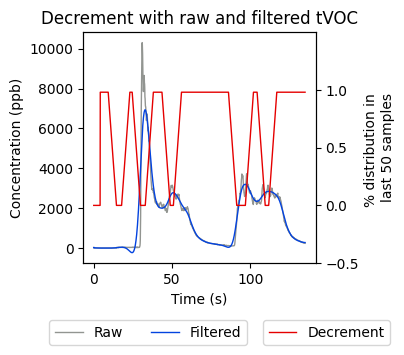

In [216]:
# Compare decrement with filtered and raw data
plt.figure(figsize=(3,3))
plt.title('Decrement with raw and filtered tVOC')

plt.plot(df25Left['timestamp'], df25Left['tVOCLeft'], label='Raw', color='xkcd:gray', linewidth=1)
plt.plot(df25Left['timestamp'], df25LeftFiltered, label='Filtered', color='xkcd:blue', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(-0.175, -0.3), ncol=2)
plt.ylabel('Concentration (ppb)')
plt.xlabel('Time (s)')

# Plot decrement in second axis
plt.twinx()
plt.plot(df25Left['timestamp'], df25Dec, label='Decrement', color='xkcd:red', linewidth=1)
plt.legend(loc='center right', bbox_to_anchor=(1.35, -0.3))
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('% distribution in \nlast 50 samples')

# plt.plot(tvocLow50['timestamp'], generateGasSquareWave(tvocLow50), 
#          label='Gas on', color='g', linewidth=1, linestyle='--')
# plt.legend(loc='center right', bbox_to_anchor=(1.3875, 0.925))
# plt.ylim(-0.5, 1.5)
# plt.yticks(np.arange(-0.5, 1.5, 0.5))
# plt.ylabel('Gas on')

In [ ]:
# Comparative graph to show effect of fan speed
fileOff = '2023-04-04_nobaselineC_front_off_0deg_25cm_cold'
fileLow = '2023-04-04_nobaselineA_front_low_0deg_25cm_cold'
fileMed = '2023-04-04_nobaselineA_front_med_0deg_25cm_cold'
fileHigh = '2023-04-04_nobaselineA_front_high_0deg_25cm_cold'
dfOffLeft = importData(parentFolder + 'LeftSensor_' + fileOff + '.csv')
dfLowLeft = importData(parentFolder + 'LeftSensor_' + fileLow + '.csv')
dfMedLeft = importData(parentFolder + 'LeftSensor_' + fileMed + '.csv')
dfHighLeft = importData(parentFolder + 'LeftSensor_' + fileHigh + '.csv')

cutoffIdx = np.abs(dfOffLeft['timestamp'] - np.max(dfLowLeft['timestamp'])).argmin()
dfOffLeft = dfOffLeft[:cutoffIdx]

Text(0, 0.5, 'Gas on')

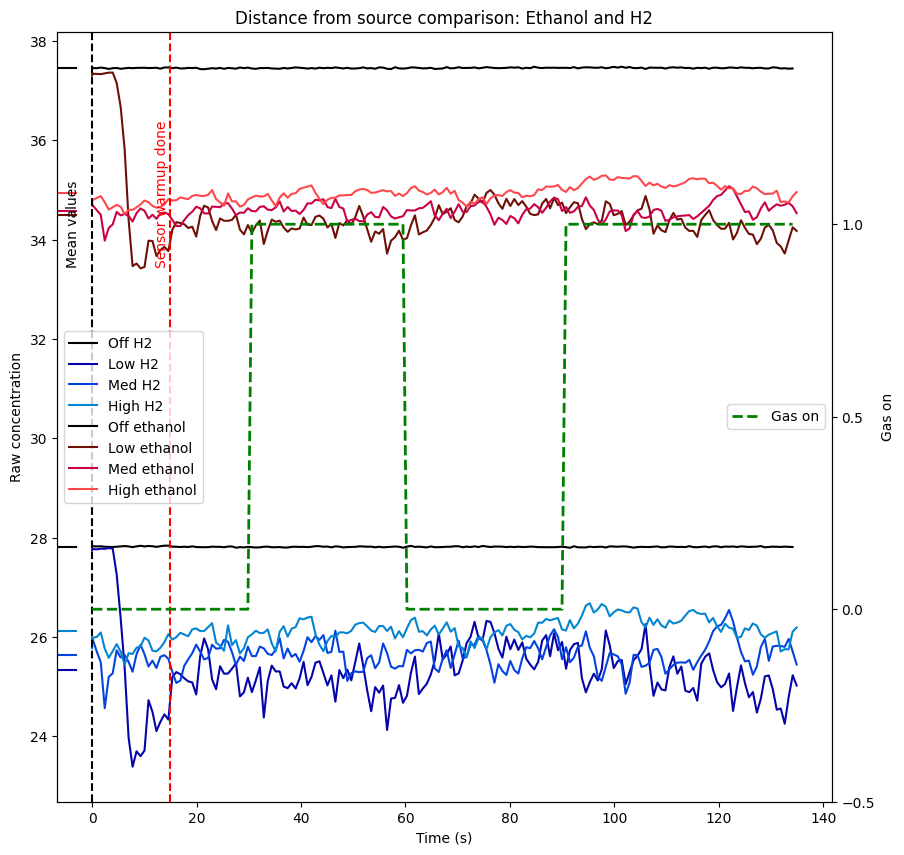

In [ ]:
# Plot of raw signals: Ethanol and H2
plt.figure(figsize=(10,10))
plt.title('Distance from source comparison: Ethanol and H2')

plt.plot(dfOffLeft['timestamp'], dfOffLeft['H2']/512, label='Off H2', color='xkcd:black')
plt.plot(dfLowLeft['timestamp'], dfLowLeft['H2']/512, label='Low H2', color='xkcd:royal blue')
plt.plot(dfMedLeft['timestamp'], dfMedLeft['H2']/512, label='Med H2', color='xkcd:blue')
plt.plot(dfHighLeft['timestamp'], dfHighLeft['H2']/512, label='High H2', color='xkcd:cerulean')
plt.plot(dfOffLeft['timestamp'], dfOffLeft['ethanol']/512, label='Off ethanol', color='xkcd:black')
plt.plot(dfLowLeft['timestamp'], dfLowLeft['ethanol']/512, label='Low ethanol', color='xkcd:reddy brown')
plt.plot(dfMedLeft['timestamp'], dfMedLeft['ethanol']/512, label='Med ethanol', color='xkcd:ruby')
plt.plot(dfHighLeft['timestamp'], dfHighLeft['ethanol']/512, label='High ethanol', color='xkcd:light red')

plt.legend(loc='center left')
plt.ylabel('Raw concentration')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--')
plt.text(12, 33.5, 'Sensor warmup done', color='r',rotation=90)
plt.axvline(x=0, color='black', linestyle='--')
plt.text(-5, 33.5, 'Mean values', color='black',rotation=90)

# Draw lines of H2 means
plt.axhline(y=np.mean(dfOffLeft['H2']/512), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfLowLeft['H2']/512), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfMedLeft['H2']/512), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfHighLeft['H2']/512), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025)

# Draw lines of ethanol means
plt.axhline(y=np.mean(dfOffLeft['ethanol']/512), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfLowLeft['ethanol']/512), color='xkcd:reddy brown', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfMedLeft['ethanol']/512), color='xkcd:ruby', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfHighLeft['ethanol']/512), color='xkcd:light red', 
            linestyle='-', xmin=0, xmax=0.025)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfOffLeft['timestamp'], generateGasSquareWave(dfOffLeft), 
         label='Gas on', color='g', linewidth=2, linestyle='--')
plt.legend(loc='center right')
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

Text(0, 0.5, 'Gas on')

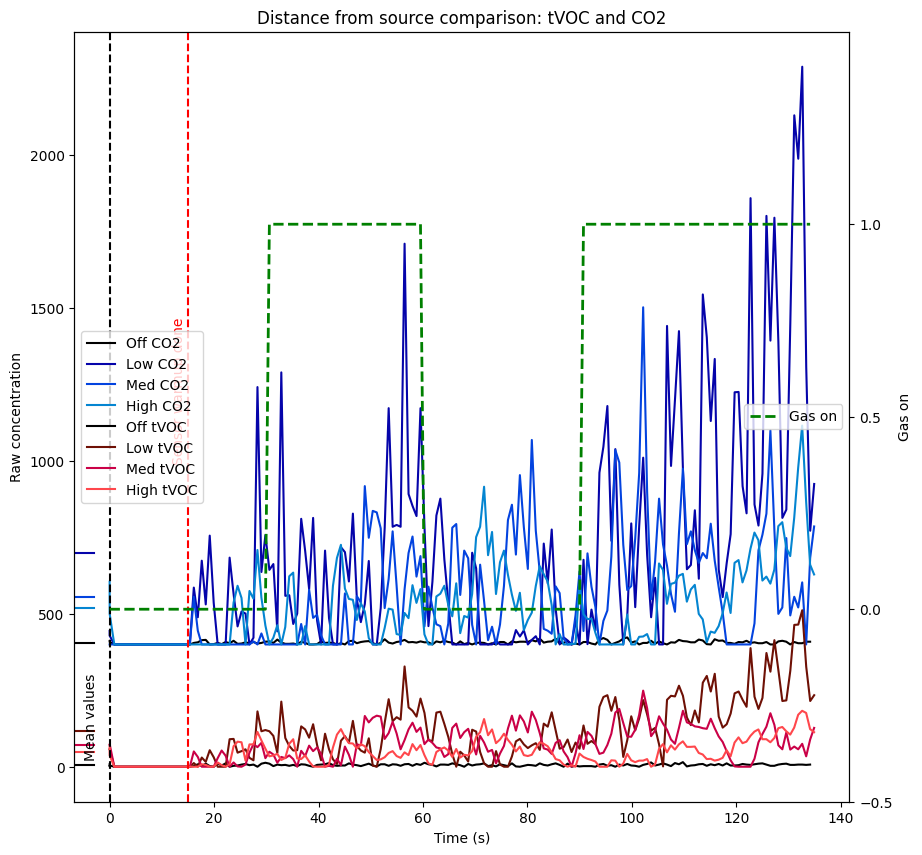

In [ ]:
# Plot of processed signals: tVOC and CO2
plt.figure(figsize=(10,10))
plt.title('Distance from source comparison: tVOC and CO2')

plt.plot(dfOffLeft['timestamp'], dfOffLeft['CO2'], label='Off CO2', color='xkcd:black')
plt.plot(dfLowLeft['timestamp'], dfLowLeft['CO2'], label='Low CO2', color='xkcd:royal blue')
plt.plot(dfMedLeft['timestamp'], dfMedLeft['CO2'], label='Med CO2', color='xkcd:blue')
plt.plot(dfHighLeft['timestamp'], dfHighLeft['CO2'], label='High CO2', color='xkcd:cerulean')
plt.plot(dfOffLeft['timestamp'], dfOffLeft['tVOC'], label='Off tVOC', color='xkcd:black')
plt.plot(dfLowLeft['timestamp'], dfLowLeft['tVOC'], label='Low tVOC', color='xkcd:reddy brown')
plt.plot(dfMedLeft['timestamp'], dfMedLeft['tVOC'], label='Med tVOC', color='xkcd:ruby')
plt.plot(dfHighLeft['timestamp'], dfHighLeft['tVOC'], label='High tVOC', color='xkcd:light red')

plt.legend(loc='center left')
plt.ylabel('Raw concentration')
plt.xlabel('Time (s)')

# Draw vertical lines
plt.axvline(x=15, color='r', linestyle='--')
plt.text(12, 1000, 'Sensor warmup done', color='r',rotation=90)
plt.axvline(x=0, color='black', linestyle='--')
plt.text(-5, 32, 'Mean values', color='black',rotation=90)

# Draw lines of H2 means
plt.axhline(y=np.mean(dfOffLeft['CO2']), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfLowLeft['CO2']), color='xkcd:royal blue', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfMedLeft['CO2']), color='xkcd:blue', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfHighLeft['CO2']), color='xkcd:cerulean', 
            linestyle='-', xmin=0, xmax=0.025)

# Draw lines of ethanol means
plt.axhline(y=np.mean(dfOffLeft['tVOC']), color='xkcd:black', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfLowLeft['tVOC']), color='xkcd:reddy brown', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfMedLeft['tVOC']), color='xkcd:ruby', 
            linestyle='-', xmin=0, xmax=0.025)
plt.axhline(y=np.mean(dfHighLeft['tVOC']), color='xkcd:light red', 
            linestyle='-', xmin=0, xmax=0.025)

# Plot gas on in second axis
plt.twinx()
plt.plot(dfOffLeft['timestamp'], generateGasSquareWave(dfOffLeft), 
         label='Gas on', color='g', linewidth=2, linestyle='--')
plt.legend(loc='center right')
plt.ylim(-0.5, 1.5)
plt.yticks(np.arange(-0.5, 1.5, 0.5))
plt.ylabel('Gas on')

In [97]:
# Function to normalize measurement data
def normalizeData(df):
    df['H2'] = df['H2']/np.max(df['H2'])
    df['ethanol'] = df['ethanol']/np.max(df['ethanol'])
    df['CO2'] = df['CO2']/np.max(df['CO2'])
    df['tVOC'] = df['tVOC']/np.max(df['tVOC'])
    return df

In [98]:
# Calculate correlation with gas on all sensors and readings
# Load right sensor data
oldParentFolder = 'Readings 05-04-23/'
file25cm = '2023-04-05_noBL_exitenter_A_30sec_front_med_0deg_25cm_cold'
file50cm = '2023-04-05_noBL_exitenter_A_30sec_front_med_0deg_50cm_cold'
file75cm = '2023-04-05_noBL_exitenter_A_30sec_front_med_0deg_75cm_cold'
file100cm = '2023-04-05_noBL_exitenter_A_30sec_front_med_0deg_100cm_cold'
fileLow = '2023-04-05_noBL_exitenter_A_30sec_front_low_0deg_50cm_cold'
fileMed = '2023-04-05_noBL_exitenter_A_30sec_front_med_0deg_50cm_cold'
fileHigh = '2023-04-05_noBL_exitenter_A_30sec_front_high_0deg_50cm_cold'

# Load left sensor data
df25Left = importData(oldParentFolder + 'LeftSensor_' + file25cm + '.csv')
df50Left = importData(oldParentFolder + 'LeftSensor_' + file50cm + '.csv')
df75Left = importData(oldParentFolder + 'LeftSensor_' + file75cm + '.csv')
df100Left = importData(oldParentFolder + 'LeftSensor_' + file100cm + '.csv')
# dfOffLeft = importData(oldParentFolder + 'LeftSensor_' + fileOff + '.csv')
dfLowLeft = importData(oldParentFolder + 'LeftSensor_' + fileLow + '.csv')
dfMedLeft = importData(oldParentFolder + 'LeftSensor_' + fileMed + '.csv')
dfHighLeft = importData(oldParentFolder + 'LeftSensor_' + fileHigh + '.csv')

# Load right sensor data
df25Right = importData(oldParentFolder + 'RightSensor_' + file25cm + '.csv')
df50Right = importData(oldParentFolder + 'RightSensor_' + file50cm + '.csv')
df75Right = importData(oldParentFolder + 'RightSensor_' + file75cm + '.csv')
df100Right = importData(oldParentFolder + 'RightSensor_' + file100cm + '.csv')
# dfOffRight = importData(oldParentFolder + 'RightSensor_' + fileOff + '.csv')
dfLowRight = importData(oldParentFolder + 'RightSensor_' + fileLow + '.csv')
dfMedRight = importData(oldParentFolder + 'RightSensor_' + fileMed + '.csv')
dfHighRight = importData(oldParentFolder + 'RightSensor_' + fileHigh + '.csv')

# Save all data to lists for looping
dfLeftList = [df25Left, df50Left, df75Left, df100Left, dfLowLeft, dfMedLeft, dfHighLeft]
dfRightList = [df25Right, df50Right, df75Right, df100Right, dfLowRight, dfMedRight, dfHighRight]

# Normalize all data to match on-off square wave magnitude
for i in range(len(dfLeftList)):
    dfLeftList[i] = normalizeData(dfLeftList[i])
    dfRightList[i] = normalizeData(dfRightList[i])

# Calculate and sum correlation
corrH2Left, corrH2Right = [], []
corrEthanolLeft, corrEthanolRight = [], []
corrCO2Left, corrCO2Right = [], []
corrTVOCLeft, corrTVOCRight = [], []
for i in range(len(dfLeftList)):
    corrH2Left.append(np.corrcoef(dfLeftList[i]['H2'], generateGasSquareWave(dfLeftList[i]))[0,1])
    corrEthanolLeft.append(np.corrcoef(dfLeftList[i]['ethanol'], generateGasSquareWave(dfLeftList[i]))[0,1])
    corrCO2Left.append(np.corrcoef(dfLeftList[i]['CO2'], generateGasSquareWave(dfLeftList[i]))[0,1])
    corrTVOCLeft.append(np.corrcoef(dfLeftList[i]['tVOC'], generateGasSquareWave(dfLeftList[i]))[0,1])
    corrH2Right.append(np.corrcoef(dfRightList[i]['H2'], generateGasSquareWave(dfRightList[i]))[0,1])
    corrEthanolRight.append(np.corrcoef(dfRightList[i]['ethanol'], generateGasSquareWave(dfRightList[i]))[0,1])
    corrCO2Right.append(np.corrcoef(dfRightList[i]['CO2'], generateGasSquareWave(dfRightList[i]))[0,1])
    corrTVOCRight.append(np.corrcoef(dfRightList[i]['tVOC'], generateGasSquareWave(dfRightList[i]))[0,1])

# Sum all correlations
corrH2Left = np.sum(np.abs(corrH2Left))
corrEthanolLeft = np.sum(np.abs(corrEthanolLeft))
corrCO2Left = np.sum(np.abs(corrCO2Left))
corrTVOCLeft = np.sum(np.abs(corrTVOCLeft))
corrH2Right = np.sum(np.abs(corrH2Right))
corrEthanolRight = np.sum(np.abs(corrEthanolRight))
corrCO2Right = np.sum(np.abs(corrCO2Right))
corrTVOCRight = np.sum(np.abs(corrTVOCRight))

In [99]:
# Show table of results
print('Left sensor correlation')
print('H2: ' + str(corrH2Left))
print('Ethanol: ' + str(corrEthanolLeft))
print('CO2: ' + str(corrCO2Left))
print('tVOC: ' + str(corrTVOCLeft))
print('Right sensor correlation')
print('H2: ' + str(corrH2Right))
print('Ethanol: ' + str(corrEthanolRight))
print('CO2: ' + str(corrCO2Right))
print('tVOC: ' + str(corrTVOCRight))

Left sensor correlation
H2: 2.2044041937268593
Ethanol: 1.5906240388936932
CO2: 2.3712624693001922
tVOC: 1.7876347570497635
Right sensor correlation
H2: 2.1839466228578894
Ethanol: 1.6477681279551066
CO2: 2.359880417748611
tVOC: 1.843350075463511


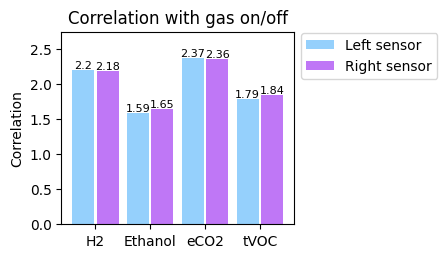

In [119]:
# Plot correlations in bar chart
plt.figure(figsize=(3, 2.5))

# Bar chart with two columns
# First column, not subplot
plt.bar(0-0.225, corrH2Left, color='xkcd:light blue', label='H2', width=0.4)
plt.bar(0+0.225, corrH2Right, color='xkcd:light purple', label='H2', width=0.4)
plt.bar(1-0.225, corrEthanolLeft, color='xkcd:light blue', label='Ethanol', width=0.4)
plt.bar(1+0.225, corrEthanolRight, color='xkcd:light purple', label='Ethanol', width=0.4)
plt.bar(2-0.225, corrCO2Left, color='xkcd:light blue', label='CO2', width=0.4)
plt.bar(2+0.225, corrCO2Right, color='xkcd:light purple', label='CO2', width=0.4)
plt.bar(3-0.225, corrTVOCLeft, color='xkcd:light blue', label='tVOC', width=0.4)
plt.bar(3+0.225, corrTVOCRight, color='xkcd:light purple', label='tVOC', width=0.4)

# Custom x axis labels
plt.xticks([0, 1, 2, 3], ['H2', 'Ethanol', 'eCO2', 'tVOC'])

# Label values on top of bars
valueList = [corrH2Left, corrH2Right, corrEthanolLeft, corrEthanolRight, corrCO2Left, corrCO2Right, corrTVOCLeft, corrTVOCRight]
for i in range(4):
    plt.text(i-0.225, valueList[i*2]+0.025, str(round(valueList[i*2], 2)), color='black', fontsize=8, horizontalalignment='center') 
    plt.text(i+0.225, valueList[i*2+1]+0.025, str(round(valueList[i*2+1], 2)), color='black', fontsize=8, horizontalalignment='center')

# Axis labels
plt.ylabel('Correlation')
# plt.xlabel('Variable')

# Axis limits
plt.ylim(0, 2.75)

# Title
plt.title('Correlation with gas on/off')
# Overwrite legend with left and right colours
plt.legend(['Left sensor', 'Right sensor'], loc='center left', bbox_to_anchor=(1,0.875))